In [13]:
import os
import re
import glob

print(os.getcwd())

def get_info(file):
    prediction_rate=1   # for perfect condition
    speedup = 0
    cpi = 0
    lines = open(file).readlines()
    for line in lines:
        if line.find('bpred_dir_rate') > 0:
            prediction_rate = float(re.findall(r'0+\.\d+', line)[0])
            # print(prediction_rate)
        if line.find('sim_CPI') == 0:
            cpi = float(re.findall(r'\d+\.\d+', line)[0])
            # print(cpi)
    return prediction_rate,cpi

app_name_list=[
    "dijkstra_small",
    "stringsearch-cabce", 
    "qsort_small", 
    "gsm-untoast", 
    "jpeg-cjpeg"
    ]

ALU_list = glob.glob("./simhome/configs/task_2_1/*")
ALU_list.sort(reverse=True)
# print(ALU_list)
csv=open("task_2_1.csv",'w')
app_perf_map={}
app_perf_cpi_map={}
print("app,"+",".join([p.split("/")[-1] for p in ALU_list]), file=csv)
for app in app_name_list:
    print(app,end=',', file=csv)
    rate_list=[]
    cpi_list=[]
    for predictor in ALU_list:
        stat_file_path = os.path.join(predictor, "Stats_"+ app + ".txt")
        rate,cpi = get_info(stat_file_path)
        print(rate, end=',', file=csv)
        rate_list.append(rate)
        cpi_list.append(cpi)
    print("", file=csv)
    app_perf_map[app] = rate_list
    app_perf_cpi_map[app] = cpi_list

for app in app_name_list:
    # print(app,":",app_perf_map[app])
    print(app,":",app_perf_cpi_map[app])

/home/hal/DAT105/Lab_2
dijkstra_small : [7.4996, 7.4996, 7.4996, 7.4996, 7.4996, 7.4996, 7.4996, 7.4996]


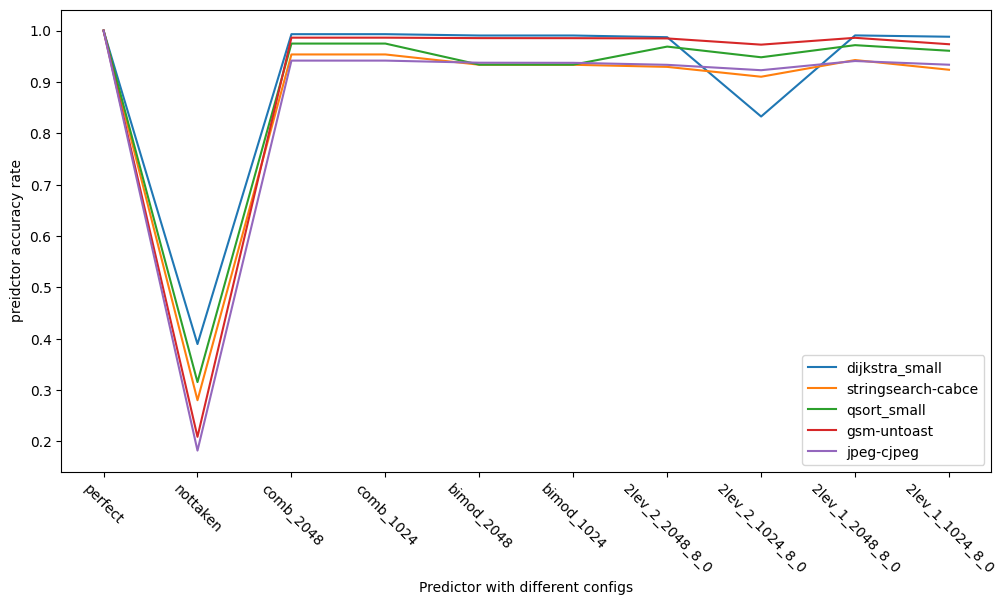

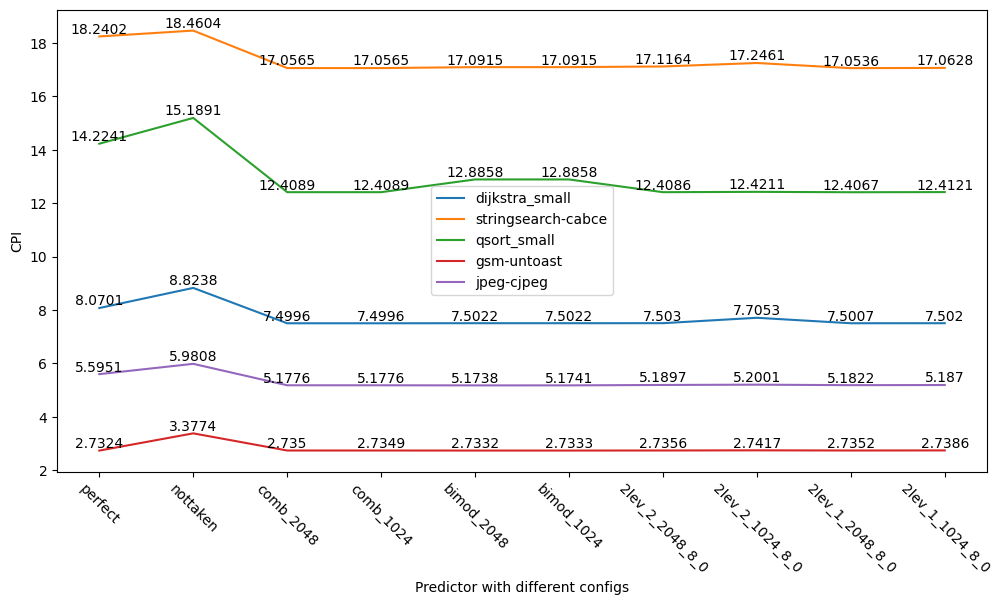

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

predictor = [p.split("/")[-1] for p in ALU_list]
def mplot(mdata, y_label, x_label='Predictor with different configs', y_ticke=None, show_value=False):
  plt.figure(figsize=(12, 6))

  bar_width = 0.15
  x = np.arange(len(predictor))

  def plot_item(offset, data, key):
    # plt.bar(x + offset * bar_width , data[key], bar_width, label=key)
    plt.plot(x + 0 * bar_width,  data[key], label=key)
    if show_value:
      for i in range(len(x)):
        plt.text(x[i],  data[key][i], str( data[key][i]), ha='center', va='bottom')

  plot_item(-2,mdata,"dijkstra_small")
  plot_item(-1,mdata,"stringsearch-cabce")
  plot_item(0,mdata,"qsort_small")
  plot_item(1,mdata,"gsm-untoast")
  plot_item(2,mdata,"jpeg-cjpeg")
  
  plt.xticks(rotation=-45)

  plt.title("")
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.xticks(x, predictor)
  if y_ticke is not None:
    plt.yticks(y_ticke)

  plt.legend()

# y_ticket= [0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.7,0.8,0.9,1]
mplot(app_perf_map, "preidctor accuracy rate")
mplot(app_perf_cpi_map, "CPI", show_value=True)
